In [1]:
#code initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from math import sqrt

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#read data
data = pd.read_csv("creditcard.csv")
#data = pd.read_csv("creditcard.csv",low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284909 entries, 0 to 284908
Data columns (total 31 columns):
Time      284909 non-null int64
V1        284909 non-null object
V2        284909 non-null object
V3        284909 non-null object
V4        284909 non-null object
V5        284909 non-null object
V6        284909 non-null object
V7        284909 non-null float64
V8        284909 non-null float64
V9        284909 non-null float64
V10       284909 non-null float64
V11       284909 non-null float64
V12       284909 non-null float64
V13       284909 non-null float64
V14       284909 non-null float64
V15       284909 non-null float64
V16       284909 non-null float64
V17       284909 non-null float64
V18       284909 non-null float64
V19       284909 non-null float64
V20       284909 non-null float64
V21       284909 non-null float64
V22       284909 non-null float64
V23       284909 non-null float64
V24       284909 non-null object
V25       284909 non-null object
V26       28490

/home/vader13/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,4,5,6,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#replace objects with NaN
column = data.columns[data.dtypes.eq(object)]

for col in column:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284909 entries, 0 to 284908
Data columns (total 31 columns):
Time      284909 non-null int64
V1        284907 non-null float64
V2        284908 non-null float64
V3        284908 non-null float64
V4        284908 non-null float64
V5        284907 non-null float64
V6        284908 non-null float64
V7        284909 non-null float64
V8        284909 non-null float64
V9        284909 non-null float64
V10       284909 non-null float64
V11       284909 non-null float64
V12       284909 non-null float64
V13       284909 non-null float64
V14       284909 non-null float64
V15       284909 non-null float64
V16       284909 non-null float64
V17       284909 non-null float64
V18       284909 non-null float64
V19       284909 non-null float64
V20       284909 non-null float64
V21       284909 non-null float64
V22       284909 non-null float64
V23       284909 non-null float64
V24       284894 non-null float64
V25       284903 non-null float64
V26    

In [4]:
#Drop NaN values
data.dropna(inplace = True)
#data.fillna(data.mean(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284880 entries, 0 to 284907
Data columns (total 31 columns):
Time      284880 non-null int64
V1        284880 non-null float64
V2        284880 non-null float64
V3        284880 non-null float64
V4        284880 non-null float64
V5        284880 non-null float64
V6        284880 non-null float64
V7        284880 non-null float64
V8        284880 non-null float64
V9        284880 non-null float64
V10       284880 non-null float64
V11       284880 non-null float64
V12       284880 non-null float64
V13       284880 non-null float64
V14       284880 non-null float64
V15       284880 non-null float64
V16       284880 non-null float64
V17       284880 non-null float64
V18       284880 non-null float64
V19       284880 non-null float64
V20       284880 non-null float64
V21       284880 non-null float64
V22       284880 non-null float64
V23       284880 non-null float64
V24       284880 non-null float64
V25       284880 non-null float64
V26    

In [5]:
#Drop Duplicate values
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284807
Data columns (total 31 columns):
Time      283726 non-null int64
V1        283726 non-null float64
V2        283726 non-null float64
V3        283726 non-null float64
V4        283726 non-null float64
V5        283726 non-null float64
V6        283726 non-null float64
V7        283726 non-null float64
V8        283726 non-null float64
V9        283726 non-null float64
V10       283726 non-null float64
V11       283726 non-null float64
V12       283726 non-null float64
V13       283726 non-null float64
V14       283726 non-null float64
V15       283726 non-null float64
V16       283726 non-null float64
V17       283726 non-null float64
V18       283726 non-null float64
V19       283726 non-null float64
V20       283726 non-null float64
V21       283726 non-null float64
V22       283726 non-null float64
V23       283726 non-null float64
V24       283726 non-null float64
V25       283726 non-null float64
V26    

In [6]:
#Amount and Time cannot be negative by domain knowledge
data = data[data.Amount>=0]
data = data[data.Time>=0]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284807
Data columns (total 31 columns):
Time      283726 non-null int64
V1        283726 non-null float64
V2        283726 non-null float64
V3        283726 non-null float64
V4        283726 non-null float64
V5        283726 non-null float64
V6        283726 non-null float64
V7        283726 non-null float64
V8        283726 non-null float64
V9        283726 non-null float64
V10       283726 non-null float64
V11       283726 non-null float64
V12       283726 non-null float64
V13       283726 non-null float64
V14       283726 non-null float64
V15       283726 non-null float64
V16       283726 non-null float64
V17       283726 non-null float64
V18       283726 non-null float64
V19       283726 non-null float64
V20       283726 non-null float64
V21       283726 non-null float64
V22       283726 non-null float64
V23       283726 non-null float64
V24       283726 non-null float64
V25       283726 non-null float64
V26    

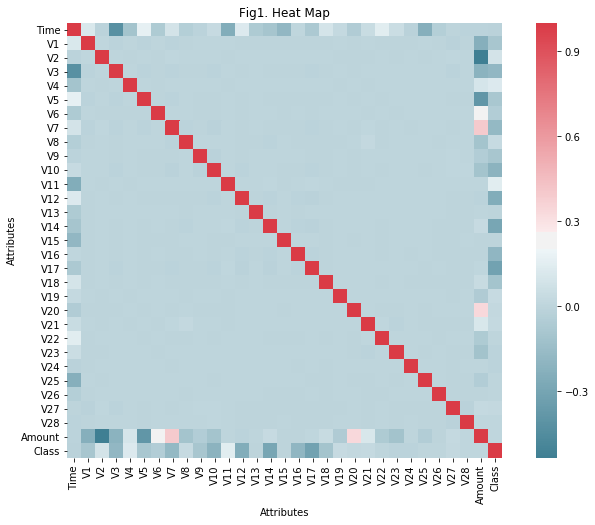

In [7]:
#Heatmap for visualization
f, ax = plt.subplots(figsize=(12,8))
correlate = data.corr()

sns.heatmap(correlate, mask=np.zeros_like(correlate, dtype=np.bool), \
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.title('Fig1. Heat Map')
plt.xlabel('Attributes')
plt.ylabel('Attributes')
plt.show()

In [8]:
#Find magnitude of correlation in sorted order
abs(correlate.Class).sort_values()

V25      0.00320
V15      0.00330
V13      0.00390
V26      0.00426
V22      0.00489
Amount   0.00578
V23      0.00633
V24      0.00721
V28      0.00968
Time     0.01236
V20      0.02149
V27      0.02189
V21      0.02636
V8       0.03307
V19      0.03363
V6       0.04392
V2       0.08462
V5       0.08781
V9       0.09402
V1       0.09449
V18      0.10534
V4       0.12933
V11      0.14907
V7       0.17235
V3       0.18232
V16      0.18719
V10      0.20697
V12      0.25071
V14      0.29338
V17      0.31350
Class    1.00000
Name: Class, dtype: float64

In [9]:
#Create two working copies of data
traindata1 = data.copy()
traindata2 = data.copy()

In [10]:
#traindata1 has all attribites except Class
traindata1 = traindata1.drop(labels=['Class'],axis=1)
traindata1.shape

(283726, 30)

In [11]:
#Performing Min_Max Normalization on data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
dataN = pd.DataFrame(np_scaled)
dataN.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.00000,0.93519,0.76649,0.88136,0.31302,0.76344,0.26767,0.26682,0.78644,0.47531,...,0.56118,0.52299,0.66379,0.39125,0.58512,0.39456,0.41898,0.31270,0.00582,0.00000
1,0.00000,0.97854,0.77007,0.84030,0.27180,0.76612,0.26219,0.26488,0.78630,0.45398,...,0.55784,0.48024,0.66694,0.33644,0.58729,0.44601,0.41635,0.31342,0.00010,0.00000
2,0.00001,0.93522,0.75312,0.86814,0.26877,0.76233,0.28112,0.27018,0.78804,0.41060,...,0.56548,0.54603,0.67894,0.28935,0.55952,0.40273,0.41549,0.31191,0.01474,0.00000
3,0.00001,0.94188,0.76530,0.86848,0.21366,0.76565,0.27556,0.26680,0.78943,0.41500,...,0.55973,0.51028,0.66261,0.22383,0.61425,0.38920,0.41767,0.31437,0.00481,0.00000
4,0.00001,0.93862,0.77652,0.86425,0.26980,0.76298,0.26398,0.26897,0.78248,0.49095,...,0.56133,0.54727,0.66339,0.40127,0.56634,0.50750,0.42056,0.31749,0.00272,0.00000


In [12]:
#Performing Min_Max Normalization on traindata1
min_max_scaler1 = preprocessing.MinMaxScaler()
np_scaled1 = min_max_scaler1.fit_transform(traindata1)
traindata1N = pd.DataFrame(np_scaled1)
traindata1N.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.00000,0.93519,0.76649,0.88136,0.31302,0.76344,0.26767,0.26682,0.78644,0.47531,...,0.58294,0.56118,0.52299,0.66379,0.39125,0.58512,0.39456,0.41898,0.31270,0.00582
1,0.00000,0.97854,0.77007,0.84030,0.27180,0.76612,0.26219,0.26488,0.78630,0.45398,...,0.57953,0.55784,0.48024,0.66694,0.33644,0.58729,0.44601,0.41635,0.31342,0.00010
2,0.00001,0.93522,0.75312,0.86814,0.26877,0.76233,0.28112,0.27018,0.78804,0.41060,...,0.58586,0.56548,0.54603,0.67894,0.28935,0.55952,0.40273,0.41549,0.31191,0.01474
3,0.00001,0.94188,0.76530,0.86848,0.21366,0.76565,0.27556,0.26680,0.78943,0.41500,...,0.57805,0.55973,0.51028,0.66261,0.22383,0.61425,0.38920,0.41767,0.31437,0.00481
4,0.00001,0.93862,0.77652,0.86425,0.26980,0.76298,0.26398,0.26897,0.78248,0.49095,...,0.58462,0.56133,0.54727,0.66339,0.40127,0.56634,0.50750,0.42056,0.31749,0.00272


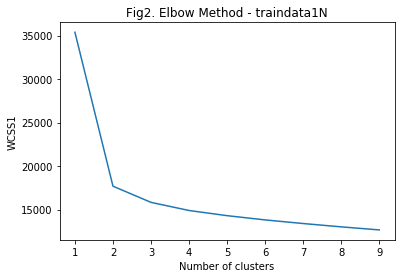

In [13]:
#Elbow method to find k for traindata1N
wcss1 = []
for i in range(1,10):
    kmeans1 = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans1.fit(traindata1N)
    wcss1.append(kmeans1.inertia_)
plt.plot(range(1,10),wcss1)
plt.title('Fig2. Elbow Method - traindata1N')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS1')
plt.show()

In [14]:
#K-means clustering for traindata1N with k=2
kmeans1 = KMeans(n_clusters = 2,init = 'k-means++',random_state=0)
clusters1 = kmeans1.fit_predict(traindata1N)
clusters1

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [15]:
#Accuracy of Classification. 
#Consider cluster labeled by '0' to be fraudulent 
#and that by '1' to be Non-fraudulent
count1 = 0
for i in range(283726):
    if dataN.values[:,30][i]==0 and clusters1[i]==1:
        count1+=1
    if dataN.values[:,30][i]==1 and clusters1[i]==0: 
        count1+=1
Accuracy1 = (count1/283726)*100
Accuracy1

53.65493469051127

In [16]:
#Precision of Fraudulent data classification 
#Calculated as Precision = Number of fraudulent points 
#correctly predicted/Total points predicted to be fraudulent
count1 = 0
total1 = 0
for i in range(283726):
    if clusters1[i]==0:
        total1+=1;
for i in range(283726):
    if dataN.values[:,30][i]==1 and clusters1[i]==0: 
        count1+=1
Precision1 = (count1/total1)*100
Precision1

0.11954254039319596

In [17]:
#Find actual no. of fraudulent points in dataset for finding Recall
data[data.Class==1].shape

(473, 31)

In [18]:
#Recall of Fraudulent data Classification
#Calculated as Recall = Number of fraudulent points 
#correctly predicted/Actual Number of fraudulent points
count1 = 0
for i in range(283726):
    if dataN.values[:,30][i]==1 and clusters1[i]==0: 
        count1+=1
Recall1 = (count1/473)*100
Recall1

33.192389006342495

In [19]:
#Dropping those attributes which are not very correlated 
#with Class...on the basis of output obtained in Out[8]
traindata2 = traindata2.drop(labels=['V25','V15','V13','V26','V22','Amount','V23',\
                                     'V24','V28','Time','V20','V27','V21','V8',\
                                     'V19','V6','Class'],axis=1)
traindata2.shape

(283726, 14)

In [20]:
#Performing Min_Max Normalization on traindata2
min_max_scaler2 = preprocessing.MinMaxScaler()
np_scaled2 = min_max_scaler2.fit_transform(traindata2)
traindata2N = pd.DataFrame(np_scaled2)
traindata2N.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.93519,0.76649,0.88136,0.31302,0.76344,0.26682,0.47531,0.51060,0.25248,0.68091,0.63559,0.43439,0.73717,0.65507
1,0.97854,0.77007,0.84030,0.27180,0.76612,0.26488,0.45398,0.50527,0.38119,0.74434,0.64122,0.46411,0.72779,0.64068
2,0.93522,0.75312,0.86814,0.26877,0.76233,0.27018,0.41060,0.51302,0.32242,0.70668,0.64047,0.35744,0.76338,0.64495
3,0.94188,0.76530,0.86848,0.21366,0.76565,0.26680,0.41500,0.50759,0.27182,0.71091,0.63637,0.41565,0.71125,0.78849
4,0.93862,0.77652,0.86425,0.26980,0.76298,0.26897,0.49095,0.52430,0.23635,0.72448,0.60841,0.43500,0.72424,0.65067


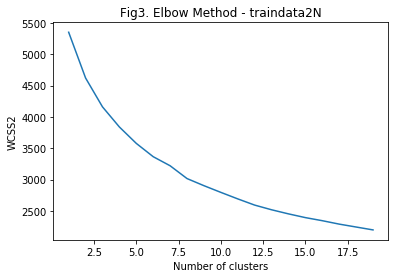

In [21]:
#Elbow method to find k for traindata2N
wcss2 = []
for i in range(1,20):
    kmeans2 = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans2.fit(traindata2N)
    wcss2.append(kmeans2.inertia_)
plt.plot(range(1,20),wcss2)
plt.title('Fig3. Elbow Method - traindata2N')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS2')
plt.show()

In [22]:
#K-means clustering for traindata2N with k=8
kmeans2 = KMeans(n_clusters = 8,init = 'k-means++',random_state=0)
clusters2 = kmeans2.fit_predict(traindata2N)
clusters2

array([5, 6, 6, ..., 0, 5, 5], dtype=int32)

In [23]:
#Accuracy of Classification. 
#Consider cluster labeled by '7' to be fraudulent and 
#that by all other labels to be Non-fraudulent
count2 = 0
for i in range(283726):
    if dataN.values[:,30][i]==0 and (clusters2[i]==0 or clusters2[i]==1 or \
                                     clusters2[i]==2 or clusters2[i]==3 or \
                                     clusters2[i]==4 or clusters2[i]==5 or \
                                     clusters2[i]==6):
        count2+=1
    if dataN.values[:,30][i]==1 and clusters2[i]==7: 
        count2+=1
Accuracy2 = (count2/283726)*100
Accuracy2

99.90977210407223

In [24]:
#Precision of Fraudulent data classification 
#Calculated as Precision = Number of fraudulent points 
#correctly predicted/Total points predicted to be fraudulent
count2 = 0
total2 = 0
for i in range(283726):
    if clusters2[i]==7:
        total2+=1;
for i in range(283726):
    if dataN.values[:,30][i]==1 and clusters2[i]==7: 
        count2+=1
Precision2_fraud = (count2/total2)*100
Precision2_fraud

85.8085808580858

In [25]:
#Precision of Non-Fraudulent data classification 
#Calculated as Precision = Number of Non-fraudulent points 
#correctly predicted/Total points predicted to be Non-fraudulent
count2 = 0
total2 = 0
for i in range(283726):
    if clusters2[i]==0 or clusters2[i]==1 or clusters2[i]==2 or clusters2[i]==3 or \
    clusters2[i]==4 or clusters2[i]==5 or clusters2[i]==6:
        total2+=1;
for i in range(283726):
    if dataN.values[:,30][i]==0 and (clusters2[i]==0 or clusters2[i]==1 or \
                                     clusters2[i]==2 or clusters2[i]==3 or \
                                     clusters2[i]==4 or clusters2[i]==5 or \
                                     clusters2[i]==6):
        count2+=1
Precision2_nonfraud = (count2/total2)*100
Precision2_nonfraud

99.92484731302682

In [26]:
#Recall of Fraudulent data Classification
#Calculated as Recall = Number of fraudulent points 
#correctly predicted/Actual Number of fraudulent points
count2 = 0
for i in range(283726):
    if dataN.values[:,30][i]==1 and clusters2[i]==7: 
        count2+=1
Recall2_fraud = (count2/473)*100
Recall2_fraud

54.96828752642706

In [27]:
#Recall of Non-Fraudulent data Classification
#Calculated as Recall = Number of Non-fraudulent points 
#correctly predicted/Actual Number of Non-fraudulent points
count2 = 0
for i in range(283726):
    if dataN.values[:,30][i]==0 and (clusters2[i]==0 or clusters2[i]==1 or \
                                     clusters2[i]==2 or clusters2[i]==3 or \
                                     clusters2[i]==4 or clusters2[i]==5 or \
                                     clusters2[i]==6):
        count2+=1
Recall2_nonfraud = (count2/(283726-473))*100
Recall2_nonfraud

99.98481922521562

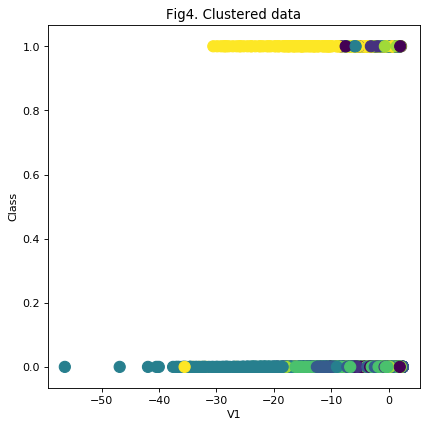

In [28]:
%matplotlib inline
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(data.iloc[:,1],data.iloc[:,30], c=clusters2,s=100, label='')
plt.title('Fig4. Clustered data')
plt.xlabel('V1')
plt.ylabel('Class')
plt.show()

In [29]:
prediction = np.zeros(283726)
for i in range(283726):
    if clusters2[i]==0 or clusters2[i]==1 or clusters2[i]==2 or clusters2[i]==3 or \
    clusters2[i]==4 or clusters2[i]==5 or clusters2[i]==6:
        prediction[i]=0;
    if clusters2[i]==7: 
        prediction[i]=1;
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
pred = pd.DataFrame(prediction)
pred.head()

,0
0,0.00000
1,0.00000
2,0.00000
3,0.00000
4,0.00000


In [31]:
#Result 
Result = pd.concat([dataN.iloc[:,30],pred], axis=1)
Result.columns = ['Actual Class','Predicted Class']
Result

,Actual Class,Predicted Class
0,0.00000,0.00000
1,0.00000,0.00000
2,0.00000,0.00000
3,0.00000,0.00000
4,0.00000,0.00000
5,0.00000,0.00000
6,0.00000,0.00000
7,0.00000,0.00000
8,0.00000,0.00000
9,0.00000,0.00000


In [32]:
#Correlation between Predicted Class and Actual Class
Result.corr()

,Actual Class,Predicted Class
Actual Class,1.00000,0.68639
Predicted Class,0.68639,1.00000


In [33]:
#Root Mean Square Error
rms = sqrt(mean_squared_error(Result.values[:,0],Result.values[:,1]))
rms

0.030037958640320633